## Ejercicio Regresión Logística

Crear un clasificador basado en el algoritmo de regresión logistica para predecir si el valor de la vivienda supera la media

entrada: housing.csv

Procedimiento:
- Cargar los datos los datos a un DataFrame y explorar brevemente
- Eliminar las observaciones que tengan algun dato faltante
- Eliminar las observaciones con el valor atípico (max) para la variable 'median_house_value'
- Aplicar one hot encoding a la variable 'ocean_proximity'
- Crear una nueva variable boolean 'above_median'
- Aplicar los pasos train-test-split para poder entrenar y evaluar el clasificador

Cuáles los valores para accuracy, matriz de confusion, precision, recall y f1 del clasificador?

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_boston

In [2]:
# Cargar los datos los datos a un DataFrame y explorar brevemente
housing_csv_df = pd.read_csv(os.path.join("", "housing.csv"))
housing_csv_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'housing.csv'

In [3]:
# Eliminar las observaciones que tengan algun dato faltante
housing_csv_df.loc[housing_csv_df['total_bedrooms'].isnull()]
housing_sin_valores_na = housing_csv_df.dropna(how='any')

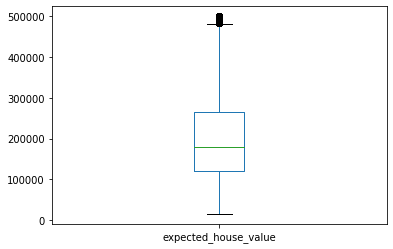

In [4]:
# Eliminar las observaciones con el valor atípico (max) para la variable 'median_house_value'
housing_sin_valores_na['expected_house_value'].plot.box()

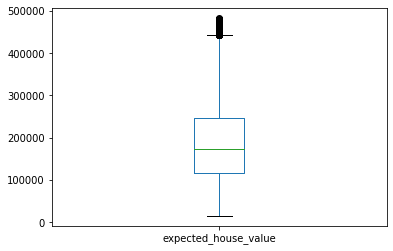

In [5]:
q1 = housing_sin_valores_na['expected_house_value'].quantile(.25)
q3 = housing_sin_valores_na['expected_house_value'].quantile(.75)
iqr = q3 - q1
indices_val_atipicos_max = housing_sin_valores_na.loc[housing_sin_valores_na['expected_house_value'] > q3 + 1.5*iqr].index
housing_sin_val_atip = housing_sin_valores_na.drop(indices_val_atipicos_max, axis=0)
housing_sin_val_atip['expected_house_value'].plot.box()

In [6]:
# Aplicar one hot encoding a la variable 'ocean_proximity'
housing_procesado = pd.get_dummies(housing_sin_val_atip, columns=['ocean_proximity'])
housing_procesado

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,expected_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [7]:
# Crear una nueva variable boolean 'above_median'
media_expexted_house_value = housing_procesado['expected_house_value'].mean()
housing_procesado['above_median'] = housing_procesado['expected_house_value'] > media_expexted_house_value
housing_procesado

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,expected_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,above_median
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,True
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,True
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,True
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,True
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,False


In [8]:
# Aplicar los pasos train-test-split para poder entrenar y evaluar el clasificador
X = housing_procesado.drop(columns=['expected_house_value']).to_numpy().astype('float')
y = housing_procesado['expected_house_value'].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Se crea al clasificador
clasificador_reg_log = LogisticRegression(random_state=0, solver='liblinear')
# Se entrena al clasificador
clasificador_reg_log.fit(X_train, y_train)

In [ ]:
# accuracy
print('accuracy del clasificador: {0:.2f}'.format(accuracy_score(y_test, clasificador_reg_log.predict(X_test))))
# confusion matrix
print('matriz de confusión del clasificador: \n {0}'.format(confusion_matrix(y_test, clasificador_reg_log.predict(X_test))))
# precision 
print('precision del clasificador: {0:.2f}'.format(precision_score(y_test, clasificador_reg_log.predict(X_test))))
# recall 
print('recall del clasificador: {0:.2f}'.format(recall_score(y_test, clasificador_reg_log.predict(X_test))))
# f1
print('f1 del clasificador: {0:.2f}'.format(f1_score(y_test, clasificador_reg_log.predict(X_test))))